In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pyvortex

In [8]:
l = np.arange(-2,2,0.05)

x, y, z = np.meshgrid(l, l, l, indexing='ij')

grid = np.stack([x,y,z])

r = np.sqrt(np.square(x[:]) + np.square(y[:]))
theta = np.arctan2(y[:],x[:])

V_theta = 1/r

V_x = V_theta * np.sin(theta)
V_y = -V_theta * np.cos(theta)
V_z = V_x[:] * 0

C = np.nan_to_num(np.array([V_x,
                  V_y,
                  V_z]),nan=0.0, posinf=0.0, neginf=0.0)

rho = np.ones_like(x)**0

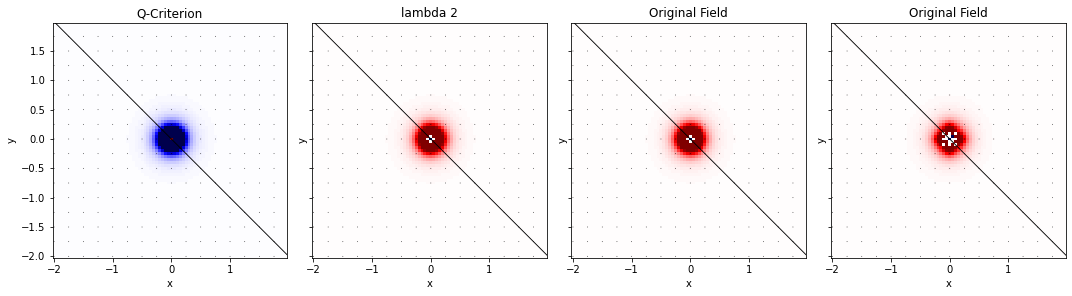

In [9]:
zslice=10

x,y,z = grid

" Make a quiver plot "
xstep = 5
ystep = 5
Xquiv = x[:]
Yquiv = y[:]
Uquiv = C[0,:,:,:] # X-component of arrow direction
Vquiv = C[1,:,:,:] # Y-component of arrow direction
Xquiv = Xquiv[::ystep,::xstep,zslice]
Yquiv = Yquiv[::ystep,::xstep,zslice]
Uquiv = Uquiv[::ystep,::xstep,zslice]
Vquiv = Vquiv[::ystep,::xstep,zslice]

fig, axs = plt.subplots(1, 4, sharex=True, sharey=True, figsize=(15,10))
ax= axs[0]    
ax.set(title=r"Q-Criterion")
img = ax.pcolormesh(x[:,:,zslice],y[:,:,zslice], pyvortex.calc_Q_criterion(C)[:,:,zslice], cmap = 'seismic', vmin=-1, vmax=1)

ax= axs[1]    
ax.set(title=r"lambda 2")
img = ax.pcolormesh(x[:,:,zslice],y[:,:,zslice], pyvortex.calc_lambda2(C)[:,:,zslice], cmap = 'seismic', vmin=-1, vmax=1)

ax= axs[2]    
ax.set(title=r"Weighted lambda 2")
img = ax.pcolormesh(x[:,:,zslice],y[:,:,zslice], pyvortex.calc_weighted_lambda2(C,rho)[:,:,zslice], cmap = 'seismic', vmin=-1, vmax=1)

ax= axs[3]    
ax.set(title=r"lambda rho")
img = ax.pcolormesh(x[:,:,zslice],y[:,:,zslice], pyvortex.calc_lambda_rho(C,rho)[:,:,zslice], cmap = 'seismic', vmin=-1, vmax=1)

for ax in axs:
    ax.set_aspect('equal')
    ax.quiver(Xquiv, Yquiv, Uquiv, Vquiv, units='xy', pivot='middle')
    ax.set(ylabel='y', xlabel='x', aspect=1)
fig.tight_layout()
plt.show()